### STEP : Abundance Analysis
#### Taxonomic assignment with Silva 16S

Using Silva 16S classifier for Qiime2. List with all [classifiers](https://docs.qiime2.org/2020.6/data-resources/). 

#### Versions 
- [Silva 138 99% OTUs full-length sequences](https://data.qiime2.org/2020.6/common/silva-138-99-nb-classifier.qza)
- [Silva 138 99% OTUs from 515F/806R region of sequences](https://data.qiime2.org/2020.6/common/silva-138-99-515-806-nb-classifier.qza)
- [Greengenes 13_8 99% OTUs full-length sequences](https://data.qiime2.org/2020.6/common/gg-13-8-99-nb-classifier.qza)
- [Greengenes 13_8 99% OTUs from 515F/806R region of sequences](https://data.qiime2.org/2020.6/common/gg-13-8-99-515-806-nb-classifier.qza)

#### Methods
- [qiime feature-classifier](https://docs.qiime2.org/2022.2/plugins/available/feature-classifier/)
- [qiime feature-classifier classify-sklearn](https://docs.qiime2.org/2021.8/plugins/available/feature-classifier/classify-sklearn)
- [qiime metadata](https://docs.qiime2.org/2022.2/plugins/available/metadata/)
- [classify-hybrid-vsearch-sklearn](https://docs.qiime2.org/2022.2/plugins/available/feature-classifier/classify-hybrid-vsearch-sklearn/)
- [qiime metadata tabulate](https://docs.qiime2.org/2022.2/plugins/available/metadata/tabulate/)
- [qiime taxa](https://docs.qiime2.org/2022.2/plugins/available/taxa/)
- [qiime taxa barplot](https://docs.qiime2.org/2022.2/plugins/available/taxa/barplot/)

## Setup and settings

In [1]:
# Importing packages
import os
import pandas as pd
from qiime2 import Artifact
from qiime2 import Visualization
from qiime2 import Metadata

from qiime2.plugins.feature_table.methods import group
from qiime2.plugins.taxa.methods import collapse

import matplotlib.pyplot as plt

from utils import *

%matplotlib inline

In [2]:
# from qiime2.plugins import demux, deblur, quality_filter, \
#                            metadata, feature_table, alignment, \
#                            phylogeny, diversity, emperor, feature_classifier, \
#                            taxa, composition

### Receiving the parameters

The following cell can receive parameters using the [papermill](https://papermill.readthedocs.io/en/latest/) tool.

In [3]:
experiment_name = 'ana-flavia-hipotese-01'
base_dir = '/home/lauro/nupeb/redemicro'
metadata_file = '/home/lauro/nupeb/redemicro/experiments/ana-flavia-superlactacao/metadata-ana-flavia-hipotese-01.tsv'
class_col = 'sample-group'
replace_files = False

In [4]:
experiment_folder = os.path.abspath(os.path.join(base_dir, 'experiments', experiment_name))
img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))

### Defining names, paths and flags

In [5]:
# QIIME2 Artifacts folder
qiime_folder = os.path.join(experiment_folder, 'qiime-artifacts')

# Input - DADA2 Artifacts
dada2_tabs_path = os.path.join(qiime_folder, 'dada2-tabs.qza')
dada2_reps_path = os.path.join(qiime_folder, 'dada2-reps.qza')
dada2_stat_path = os.path.join(qiime_folder, 'dada2-stat.qza')

# Input - Metataxonomy Artifacts
metatax_path = os.path.join(qiime_folder, 'metatax.qza')
# metatax_view_path = os.path.join(qiime_folder, 'metatax.qzv')
# metatax_bar_path = os.path.join(qiime_folder, 'metatax-bar.qzv')

# Flag - Load or create files
need_tax = not (os.path.isfile(metatax_path)) or replace_files

## Step execution

### Load input files

This Step import the QIIME2 `SampleData[PairedEndSequencesWithQuality]` Artifact with all demultiplexed sequences and the `Metadata` file.

In [6]:
#Load Metadata
metadata_qa = Metadata.load(metadata_file)

In [7]:
metatax = Artifact.load(metatax_path)
metatax_df = metatax.view(Metadata).to_dataframe()
metatax_df['Confidence'] = metatax_df['Confidence'].astype('float32')

tabs = Artifact.load(dada2_tabs_path)
tabs_df = tabs.view(Metadata).to_dataframe().T

In [8]:
tax_levels = ['Reino', 'Filo', 'Classe', 'Ordem', 'Família', 'Gênero', 'Espécie']
taxons_col = metatax_df['Taxon']
metatax_split_df = pd.DataFrame(columns=tax_levels)
metatax_split_df[tax_levels] = taxons_col.str.split(';', expand=True)
for t in tax_levels:
    metatax_split_df[t] = metatax_split_df[t].str.strip()

In [9]:
freq_tax_df = pd.merge(tabs_df, metatax_split_df, left_index=True, right_index=True)
freq_tax_df

,210421121673,210421121674,210421121675,210421121676,210421121677,210421121678,210421121679,210421121680,210421121681,Reino,Filo,Classe,Ordem,Família,Gênero,Espécie
640eca1305ad0fe51b1a4d981b97cf21,0.0,0.0,2687.0,0.0,0.0,0.0,2665.0,4190.0,0.0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Muribaculaceae,g__Muribaculaceae,s__uncultured_bacterium
aeb100121ba5065dd71cd88248f1b4db,0.0,0.0,1541.0,1422.0,0.0,0.0,1911.0,1783.0,0.0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Muribaculaceae,g__Muribaculaceae,s__uncultured_bacterium
68e2e8b42d7fa551b7d9113a8ba0b103,1117.0,511.0,0.0,1266.0,0.0,0.0,0.0,1520.0,807.0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Muribaculaceae,g__Muribaculaceae,s__uncultured_bacterium
a1f78eba8fcf70b294acf1d5c912446e,0.0,987.0,792.0,219.0,1225.0,1500.0,0.0,207.0,0.0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Muribaculaceae,g__Muribaculaceae,s__uncultured_bacterium
b9844b8c59ae0915d46e6d8f05a0365d,0.0,1346.0,0.0,755.0,0.0,801.0,501.0,1012.0,238.0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides_fragilis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b41e1ddb743af8b208e17456dbf5fae2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,d__Bacteria,p__Patescibacteria,c__Saccharimonadia,o__Saccharimonadales,f__Saccharimonadaceae,g__Candidatus_Saccharimonas,s__uncultured_bacterium
9feb320c25366f62d27bc6a70e6e0cd4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,None
a5520daef5a19f5a11cedd71e4ae1c94,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Muribaculaceae,g__Muribaculaceae,s__uncultured_bacterium
379a2e55202924502b84486c54c3e0d4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Muribaculaceae,g__Muribaculaceae,s__uncultured_bacterium


Shape: (567, 2)

count    567.000000
mean       0.925666
std        0.086892
min        0.392795
25%        0.879329
50%        0.956144
75%        0.999552
max        1.000000
Name: Confidence, dtype: float64


<AxesSubplot:>

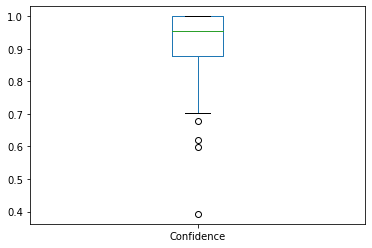

In [10]:
print(f'Shape: {metatax_df.shape}\n')
print(metatax_df['Confidence'].describe())
metatax_df['Confidence'].plot.box()

                                       Taxon  Confidence
Feature ID                                              
cbb6311b89baca740df217edd9fd72c6  Unassigned    0.677700
219c90040dcbeca193fa8903f3b638b6  Unassigned    0.618642
76a3ad98314d0c1c2d7788a8020f1033  Unassigned    0.599194
0f7f22745489d108c1ee0b8de3bcb07a  Unassigned    0.392795

Shape: (4, 2)

count    4.000000
mean     0.572082
std      0.124099
min      0.392795
25%      0.547594
50%      0.608918
75%      0.633406
max      0.677700
Name: Confidence, dtype: float64


<AxesSubplot:>

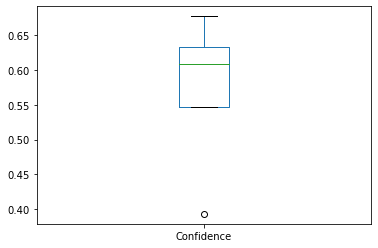

In [11]:
conf = metatax_df['Confidence']
tmp_df = metatax_df[(conf < .7)]
print(f'{tmp_df}\n')
print(f'Shape: {tmp_df.shape}\n')
print(tmp_df['Confidence'].describe())
tmp_df['Confidence'].plot.box()

In [12]:
metatax_df[metatax_df['Taxon']=='Unassigned']

,Taxon,Confidence
Feature ID,,
cbb6311b89baca740df217edd9fd72c6,Unassigned,0.677700
219c90040dcbeca193fa8903f3b638b6,Unassigned,0.618642
76a3ad98314d0c1c2d7788a8020f1033,Unassigned,0.599194
0f7f22745489d108c1ee0b8de3bcb07a,Unassigned,0.392795
4f82c9533e7f5f259f35b235c426cdea,Unassigned,0.953276


count    562.000000
mean       0.928133
std        0.081463
min        0.701427
25%        0.882551
50%        0.956694
75%        0.999580
max        1.000000
Name: Confidence, dtype: float64


<AxesSubplot:>

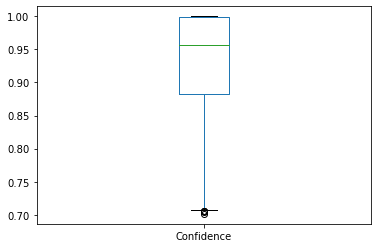

In [13]:
print(metatax_df[metatax_df['Taxon']!='Unassigned']['Confidence'].describe())
metatax_df[metatax_df['Taxon']!='Unassigned']['Confidence'].plot.box()

In [14]:
filtered_metatax_df = freq_tax_df[metatax_df['Taxon']!='Unassigned']
print(filtered_metatax_df.shape)

(562, 16)


In [15]:
def get_samples_ids_by_group(m, group_idx):
    df = m.to_dataframe()
    unique_values = df[group_idx].unique()
    return unique_values, {i: df[df[group_idx]==str(i)].index for i in unique_values}

def get_grouped_freq_tax(df, groups_ids, group):
    ndf = df[groups_ids[group]]
    return ndf

def get_features(df, features):
    return df[df.index.isin(features)]

In [16]:
groups_idx, groups_ids  = get_samples_ids_by_group(metadata_qa, 'sample-group')
groups_counts = dict()
groups_features = dict()
for g_idx in groups_idx:
    g = get_grouped_freq_tax(filtered_metatax_df, groups_ids, group=g_idx)
    g = g[g.sum(axis=1) > 0]
    groups_counts[g_idx] = g
    groups_features[g_idx] = get_features(filtered_metatax_df, g.index)

In [17]:
# # Separate by samples groups
# groups = get_samples_ids_by_group(metadata_qa, class_col)
# g0df = get_grouped_freq_tax(filtered_metatax_df, groups, group='NR')
# g1df = get_grouped_freq_tax(filtered_metatax_df, groups, group=1)
# g2df = get_grouped_freq_tax(filtered_metatax_df, groups, group=2)

# # Remove features with sum zero
# g0df = g0df[g0df.sum(axis = 1) > 0]
# g1df = g1df[g1df.sum(axis = 1) > 0]
# g2df = g2df[g2df.sum(axis = 1) > 0]

# tax_g0_df = get_features(filtered_metatax_df, g0df.index)
# tax_g1_df = get_features(filtered_metatax_df, g1df.index)
# tax_g2_df = get_features(filtered_metatax_df, g2df.index)

In [18]:
def unique_names(df, levels):
    import pandas as pd
    
    unique_names = {l: list(filter(None, df[l].unique())) for l in levels}
    return unique_names

ids = ['Reino', 'Filo', 'Classe', 'Ordem', 'Família', 'Gênero', 'Espécie']
cols = [*groups_idx, 'Union']
# groups = (tax_g0_df, tax_g1_df, tax_g2_df, filtered_metatax_df)
groups = [*[x for _, x in groups_features.items()], filtered_metatax_df]
df = pd.DataFrame(index=ids, columns=cols)

for i in range(len(groups)):
    g = groups[i]
    for k, v in unique_names(g, tax_levels).items():
        df[cols[i]][k] = len(v)

print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &  NR &  NC & Union \\
\midrule
Reino   &   1 &   1 &     1 \\
Filo    &   6 &   8 &     8 \\
Classe  &   8 &  10 &    11 \\
Ordem   &  20 &  19 &    25 \\
Família &  28 &  31 &    36 \\
Gênero  &  36 &  50 &    57 \\
Espécie &  14 &  19 &    24 \\
\bottomrule
\end{tabular}



In [19]:
latex = f'''
\\begin{{table}}[H] \centering

{df.to_latex()}
\caption{{A tabela apresenta as quantas taxonomias distintas foram encontradas de cada uma das fases do ciclo reprodutivo e o total, considerando a interseção das fases. Os valores em cada linha são de um dos diferentes níveis taxonômicos.}}
    \label{{tab:tax-count}}
\end{{table}}
'''
print(latex)


\begin{table}[H] \centering

\begin{tabular}{llll}
\toprule
{} &  NR &  NC & Union \\
\midrule
Reino   &   1 &   1 &     1 \\
Filo    &   6 &   8 &     8 \\
Classe  &   8 &  10 &    11 \\
Ordem   &  20 &  19 &    25 \\
Família &  28 &  31 &    36 \\
Gênero  &  36 &  50 &    57 \\
Espécie &  14 &  19 &    24 \\
\bottomrule
\end{tabular}

\caption{A tabela apresenta as quantas taxonomias distintas foram encontradas de cada uma das fases do ciclo reprodutivo e o total, considerando a interseção das fases. Os valores em cada linha são de um dos diferentes níveis taxonômicos.}
    \label{tab:tax-count}
\end{table}



In [20]:
# Perform group by applying sum function
group_tab = group(tabs, metadata=metadata_qa.get_column(class_col), axis='sample', mode='sum').grouped_table

group_tab_df = group_tab.view(Metadata).to_dataframe()
group_tab_df

,640eca1305ad0fe51b1a4d981b97cf21,aeb100121ba5065dd71cd88248f1b4db,68e2e8b42d7fa551b7d9113a8ba0b103,a1f78eba8fcf70b294acf1d5c912446e,b9844b8c59ae0915d46e6d8f05a0365d,ee8d45d6473b3dcd2f7ca8376527096d,a22932ee01319a19ab6e461c2d3af0b0,8545edbef9223ab316c1d11daaecb016,26462262283d443b774055101af1683c,b69470eb593929efb494cc9581d3e759,...,e120b2fb24b9d079d6cc30581ce2b8f4,02f078466aae44ee78fc73e2501185bb,ca9bcca2a4797b74ddb02f2f7946225d,dfc89a026f6c5ff1bcbca430f83ee711,df92d5ddf36a93419475864e575e3a43,b41e1ddb743af8b208e17456dbf5fae2,9feb320c25366f62d27bc6a70e6e0cd4,a5520daef5a19f5a11cedd71e4ae1c94,379a2e55202924502b84486c54c3e0d4,e9783139e2785a41acdb72f93f61ab7b
id,,,,,,,,,,,,,,,,,,,,,
NR,6855.0,3694.0,2327.0,2932.0,2552.0,4272.0,1264.0,1960.0,3716.0,3647.0,...,0.0,5.0,5.0,5.0,0.0,2.0,0.0,0.0,1.0,1.0
NC,2687.0,2963.0,2894.0,1998.0,2101.0,0.0,2929.0,1820.0,0.0,0.0,...,7.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0


In [21]:
species_by_phase = collapse(group_tab, taxonomy=metatax, level=7).collapsed_table
species_by_phase_df = species_by_phase.view(Metadata).to_dataframe().T
species_by_phase_df['all'] = species_by_phase_df.sum(axis=1)
species_by_phase_df = species_by_phase_df.reset_index()
species_by_phase_df

id,index,NR,NC,all
0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,96752.0,84266.0,181018.0
1,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,2552.0,2101.0,4653.0
2,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,12031.0,8738.0,20769.0
3,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,1908.0,6621.0,8529.0
4,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,36197.0,29132.0,65329.0
...,...,...,...,...
93,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysip...,0.0,85.0,85.0
94,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,94.0,91.0,185.0
95,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,60.0,0.0,60.0
96,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysip...,56.0,0.0,56.0


### Top abundances counts

In [22]:
def filter_names(df, level, invalid_words):
    tax_idx = level - 8
    to_remove = list()
    for i, r in df.iterrows():
        word = r['index'].split(';')[tax_idx][3:]
        invalid_flag = False
        for w in invalid_words:
            if w in word:
                invalid_flag = True
                break
        if invalid_flag:
            to_remove.append(i)
    df = df.drop(df.index[to_remove])
    return df

species_by_phase_df = filter_names(species_by_phase_df, 7, ('uncultured', 'microbiom', 'metagenome', 'human_', '_bacterium'))

In [23]:
species_by_phase_df['mean'] = species_by_phase_df[groups_idx].mean(axis=1)
species_by_phase_df.sort_values(by='all', ascending=False)
fname = os.path.join(experiment_folder, 'species-abundances-filtered.xlsx')
species_by_phase_df.to_excel(fname)

In [24]:
def top_counts(df, col_idx, top, filtering):
    indexes = []
    species = []
    counts = []
    tax_names = []
    cnt = 0
    new_df = df
    new_df = df.sort_values(by=col_idx, ascending=False)
    for i, row in new_df.iterrows():
        print('------')
        print('>>', type(row))
        print(row)
        print('------')
        name = row['index'].split(';')[-1]
        invalid_flag = False
        if name != '__':
            name = name[3:]
            if not filtering:
                cnt += 1
                species.append(name)
                counts.append(int(row))
                tax_names.append(row['index'])
                indexes = i
            else:
                invalid_names = ('uncultured', 'microbiom', 'metagenome', 'human_', '_bacterium')
                for invalid in invalid_names:
                    if invalid in name:
                        invalid_flag = True
                        break
                if not invalid_flag:
                    cnt += 1
                    species.append(name)
                    counts.append(int(row))
                    tax_names.append(row['index'])
                    indexes = i
            if cnt >= top:
                break
    return species, counts, tax_names, indexes

In [25]:
species_p0, counts_p0, full_tax, indexes = top_counts(species_by_phase_df, 'all', top=10, filtering=True)
# for i, c in enumerate(counts_p0):
#     print(f'{i+1} - {species_p0[i]}: {c}')

------
>> <class 'pandas.core.series.Series'>
id
index    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
NR                                                 36197.0
NC                                                 29132.0
all                                                65329.0
mean                                               32664.5
Name: 4, dtype: object
------
------
>> <class 'pandas.core.series.Series'>
id
index    d__Bacteria;p__Firmicutes;c__Clostridia;o__Lac...
NR                                                  7656.0
NC                                                 12955.0
all                                                20611.0
mean                                               10305.5
Name: 11, dtype: object
------
------
>> <class 'pandas.core.series.Series'>
id
index    d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
NR                                                  5299.0
NC                                                  7741.0
all                      

TypeError: cannot convert the series to <class 'int'>